1. 두 csv 파일을 pandas를 이용해 DataFrame 으로 불러오세요

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

creatures = pd.read_csv('./creatures.csv')
environment = pd.read_csv('./environment.csv')

In [2]:
creatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10 non-null     int64 
 1   species  10 non-null     object
 2   weight   10 non-null     int64 
 3   height   10 non-null     int64 
 4   age      10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [3]:
environment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10 non-null     int64 
 1   temperature  10 non-null     int64 
 2   humidity     10 non-null     int64 
 3   habitat      10 non-null     object
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


2. 각 종(species)별로 생물들의 평균 몸무게와 키를 계산하고 결과를 출력하세요.

In [4]:
creatures.groupby('species')[['weight', 'height']].mean()

,weight,height
species,,
Glimix,80.666667,140.000000
Lumina,52.666667,122.333333
Orbitalon,29.000000,112.500000
Shadowine,102.500000,157.500000


3. 각종(species)별로 생물 나이의 중앙값을 계산하고 결과를 출력하세요.

In [5]:
creatures.groupby('species')[['age']].median()

,age
species,
Glimix,8.0
Lumina,5.0
Orbitalon,2.5
Shadowine,14.5


4. 나이가 많은 순서대로 데이터를 정렬해보고, 가장 나이가 많은 생물의 정보(species, weight , height, age )를 출력하세요

In [6]:
creatures_sort = creatures.sort_values(by=['age'], ascending = False)
print(f"가장 나이가 많은 생물의 정보\n \
        species: {creatures_sort.iloc[0]['species']} \n \
        weight : {creatures_sort.iloc[0]['weight']} \n \
        height : {creatures_sort.iloc[0]['height']} \n \
        age : {creatures_sort.iloc[0]['age']}")
creatures_sort.iloc[[0]]

가장 나이가 많은 생물의 정보
         species: Shadowine 
         weight : 100 
         height : 160 
         age : 15


,id,species,weight,height,age
5,6,Shadowine,100,160,15


5. 두 데이터(creature.csv, enviorment.csv)를 `id` 기준으로 합쳐주세요.

In [7]:
merge_df = pd.merge(creatures, environment, how='inner', on='id')
merge_df

,id,species,weight,height,age,temperature,humidity,habitat
0,1,Lumina,50,120,5,22,60,Forest
1,2,Glimix,80,140,8,35,20,Desert
2,3,Orbitalon,30,110,2,15,80,Mountain
3,4,Glimix,85,145,9,25,65,Forest
4,5,Lumina,55,125,6,10,90,Swamp
5,6,Shadowine,100,160,15,28,50,Forest
6,7,Orbitalon,28,115,3,15,85,Mountain
7,8,Lumina,53,122,4,20,75,Swamp
8,9,Glimix,77,135,7,30,40,Desert
9,10,Shadowine,105,155,14,18,70,Mountain


6. 생물이 서식하는 환경(`habitat`) 별로 평균 몸무게와 키를 계산하고 결과를 출력하세요.

In [8]:
merge_df.groupby('habitat')[['weight', 'height']].agg(['mean'])

,weight,height
,mean,mean
habitat,,
Desert,78.500000,137.500000
Forest,78.333333,141.666667
Mountain,54.333333,126.666667
Swamp,54.000000,123.500000


7. 생물이 서식하는 환경의 평균 습도(`humidity`)와 생물의 체중(`weight`) 간의 상관계수를 계산해 보세요.

In [9]:
merge_df[['humidity', 'weight']].corr()

,humidity,weight
humidity,1.000000,-0.534546
weight,-0.534546,1.000000


8. 각 생물에 대해 체중 대비 키 비율(`height / weight`)을 계산하고 값이 가장 높은 생물의 정보를 출력하세요.

In [10]:
maxidx = (creatures['height'] / creatures['weight']).idxmax()
creatures.iloc[[maxidx]]

,id,species,weight,height,age
6,7,Orbitalon,28,115,3


9. 평균 기온(`temperature`)이 0°C ~ 14°C, 15°C ~ 29°C, 30°C 이상인 서식지로 그룹을 나누고, 각 그룹별로 생물의 평균 몸무게와 키를 계산하세요.

In [11]:
bins = [0, 14, 29, merge_df['temperature'].max()]
print(pd.cut(merge_df['temperature'], bins).value_counts())
merge_df['temperature_category'] = pd.cut(merge_df['temperature'], bins, labels=['추움', '중간', '따뜻함'])
merge_df.groupby('temperature_category', observed=False)[['weight', 'height']].agg(['mean'])

temperature
(14, 29]    7
(29, 35]    2
(0, 14]     1
Name: count, dtype: int64


,weight,height
,mean,mean
temperature_category,,
추움,55.000000,125.000000
중간,64.428571,132.428571
따뜻함,78.500000,137.500000


종별 평균 몸무게와 키를 막대 그래프로 시각화해보세요.

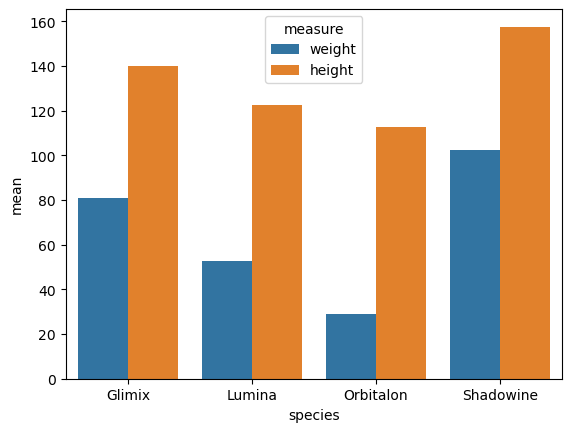

In [12]:
df = creatures.groupby('species')[['weight', 'height']].mean().reset_index()

melted_df = pd.melt(df, id_vars='species', value_vars=['weight', 'height'],
                    var_name ='measure', value_name = 'mean')

sns.barplot(data=melted_df, x='species', y='mean', hue='measure')
plt.show()

서식지 별 평균 몸무게와 키를 막대 그래프로 시각화해보세요.

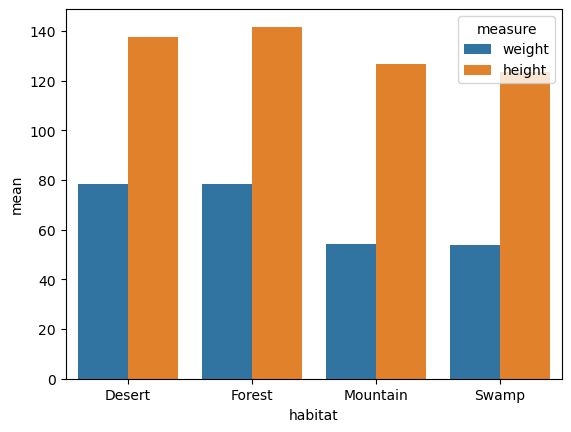

In [13]:
df = merge_df.groupby('habitat')[['weight', 'height']].mean().reset_index()

melted_df = pd.melt(df, id_vars='habitat', value_vars=['weight', 'height'],
                    var_name='measure', value_name='mean')

sns.barplot(data=melted_df, x ='habitat', y='mean', hue='measure')
plt.show()


생물들의 나이대 분포를 히스토그램으로 시각화해보세요.

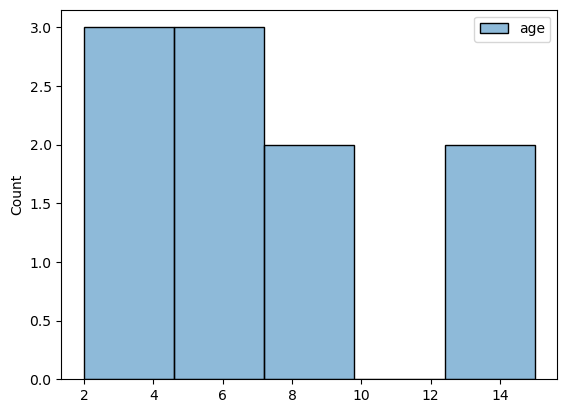

In [14]:
df = creatures[['age']]
sns.histplot(data=df)
plt.show()

생물들의 몸무게와 키를 산점도(scatter plot)으로 시각화해보세요. 종별로 색을 달리해서 시각화해보세요.

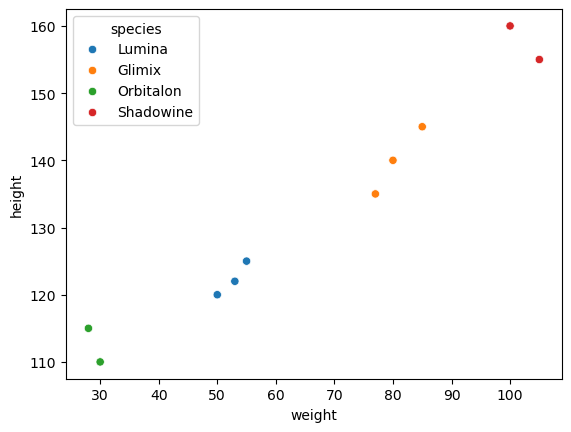

In [15]:
sns.scatterplot(data=creatures, x='weight', y='height', hue='species')
plt.show()